<a href="https://colab.research.google.com/github/shadabmalikcse/r-programming/blob/main/R_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Q1. Create a file that contains 1000 lines of random strings.

In [ ]:
# Load required package
if(!require(stringi)) install.packages("stringi", repos = "http://cran.us.r-project.org")
library(stringi)

# Function to generate a random string of a given length
generate_random_string <- function(length) {
  return(stri_rand_strings(1, length, pattern = "[A-Za-z0-9]"))
}

# Generate 1000 lines of random strings
num_lines <- 1000
string_length <- 10  # Length of each random string

# Create a vector to store the random strings
random_strings <- sapply(1:num_lines, function(x) generate_random_string(string_length))

# Write the random strings to a file
output_file <- "random_strings.txt"
writeLines(random_strings, con = output_file)

cat("File 'random_strings.txt' has been created with", num_lines, "lines of random strings.")


Loading required package: stringi



File 'random_strings.txt' has been created with 1000 lines of random strings.

### Q2. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform the following operations:
(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number
rows having missing values.

(ii) Replace all the NA values with the average of the column value.

(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns
having correlation <=0.7.

(iv) Normalize all the values in the dataset between 0 and 10.

(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

In [ ]:
# Step 1: Generate random dataset
set.seed(0)
data <- matrix(sample(1:200, 100*30, replace=TRUE), nrow=100, ncol=30)
df <- as.data.frame(data)

# Step 2: Replace values with NA
df[10:60, ] <- NA

# Count rows with missing values
rows_with_missing <- sum(rowSums(is.na(df)) > 0)
cat("Number of rows with missing values:", rows_with_missing, "\n")

# Step 3: Replace NA values with column mean
df <- apply(df, 2, function(x) ifelse(is.na(x), mean(x, na.rm=TRUE), x))

# Convert back to data frame if apply returns a matrix
df <- as.data.frame(df)

# Step 4: Calculate Pearson correlation and plot heatmap
correlation_matrix <- cor(df, use="pairwise.complete.obs")

# Plot heatmap
library(ggplot2)
library(reshape2)

melted_corr <- melt(correlation_matrix)
ggplot(data=melted_corr, aes(Var1, Var2, fill=value)) +
  geom_tile(color="white") +
  scale_fill_gradient2(low="blue", high="red", mid="white",
                       midpoint=0, limit=c(-1,1), space="Lab",
                       name="Pearson\nCorrelation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_fixed()

# Select columns with correlation <= 0.7
corr_threshold <- 0.7
selected_columns <- names(which(apply(abs(correlation_matrix) <= corr_threshold, 2, all)))
cat("Columns with correlation <= ", corr_threshold, ":\n")
cat(selected_columns, "\n")

# Step 5: Normalize values between 0 and 10
normalized_df <- as.data.frame(apply(df, 2, function(x) {
  (x - min(x, na.rm=TRUE)) / (max(x, na.rm=TRUE) - min(x, na.rm=TRUE)) * 10
}))

# Step 6: Replace values with binary indicator
binary_df <- as.data.frame(lapply(df, function(x) ifelse(x <= 0.5, 1, 0)))

# Displaying the first few rows of the processed dataframes
cat("\nNormalized Dataset:\n")
print(head(normalized_df))

cat("\nBinary Indicator Dataset:\n")
print(head(binary_df))


Number of rows with missing values: 51 


ERROR: Error in library(reshape2): there is no package called ‘reshape2’


### Q3. Create a random dataset of 500 rows and 10 columns.

Columns 1 to 4 are defined between [-10, 10];

Columns 5 to 8 are defined between [10, 20];

Columns 9 to 10 are defined between [-100, 100].

Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric
graph using each algorithm.

(i) K-Mean clustering

(ii) Hierarchical clustering

ERROR: Error in library(factoextra): there is no package called ‘factoextra’


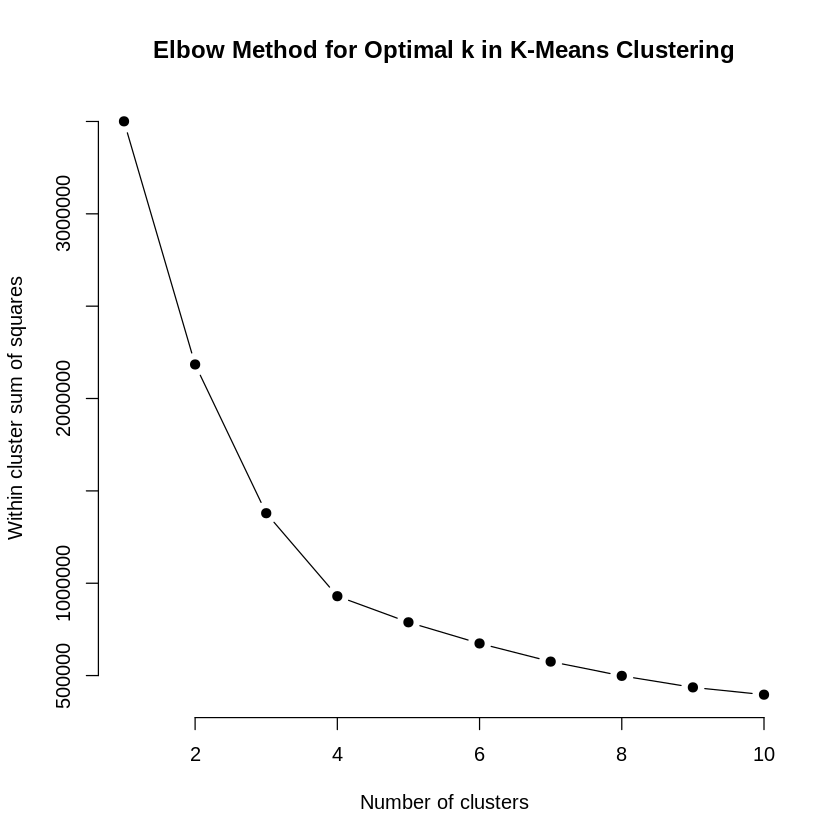

In [ ]:
# Step 1: Generate random dataset
set.seed(0)
data <- matrix(NA, 500, 10)

# Columns 1 to 4: [-10, 10]
data[, 1:4] <- matrix(runif(500 * 4, min = -10, max = 10), ncol = 4)

# Columns 5 to 8: [10, 20]
data[, 5:8] <- matrix(runif(500 * 4, min = 10, max = 20), ncol = 4)

# Columns 9 to 10: [-100, 100]
data[, 9:10] <- matrix(runif(500 * 2, min = -100, max = 100), ncol = 2)

# Convert matrix to dataframe
df <- as.data.frame(data)

# Step 2: K-Means Clustering
# Determine optimal number of clusters using elbow method
wss <- sapply(1:10, function(k) {
  kmeans(df, centers = k, nstart = 10)$tot.withinss
})

# Plot elbow method graph
plot(1:10, wss, type = "b", pch = 19, frame = FALSE,
     xlab = "Number of clusters",
     ylab = "Within cluster sum of squares",
     main = "Elbow Method for Optimal k in K-Means Clustering")

# Perform K-Means clustering with optimal k
k <- 3  # Choose the optimal number of clusters based on the elbow method
kmeans_model <- kmeans(df, centers = k, nstart = 10)
df$cluster_kmeans <- as.factor(kmeans_model$cluster)

# Plot distance metric graph for K-Means clustering
library(factoextra)
fviz_dist(dist(df), gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

# Step 3: Hierarchical Clustering
# Perform hierarchical clustering with different linkage methods
hc_complete <- hclust(dist(df), method = "complete")
hc_average <- hclust(dist(df), method = "average")
hc_ward <- hclust(dist(df), method = "ward.D2")

# Plot dendrograms for different linkage methods
par(mfrow = c(1, 3))
plot(hc_complete, main = "Complete Linkage", xlab = "", sub = "", cex = 0.6)
plot(hc_average, main = "Average Linkage", xlab = "", sub = "", cex = 0.6)
plot(hc_ward, main = "Ward's Method", xlab = "", sub = "", cex = 0.6)


### Q4. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]. Perform the following operations:

(i) Plot scatter graph between Column 5 and Column 6.

(ii) Plot histogram of each column in single graph.

(iii) Plot the Box plot of each column in single graph.


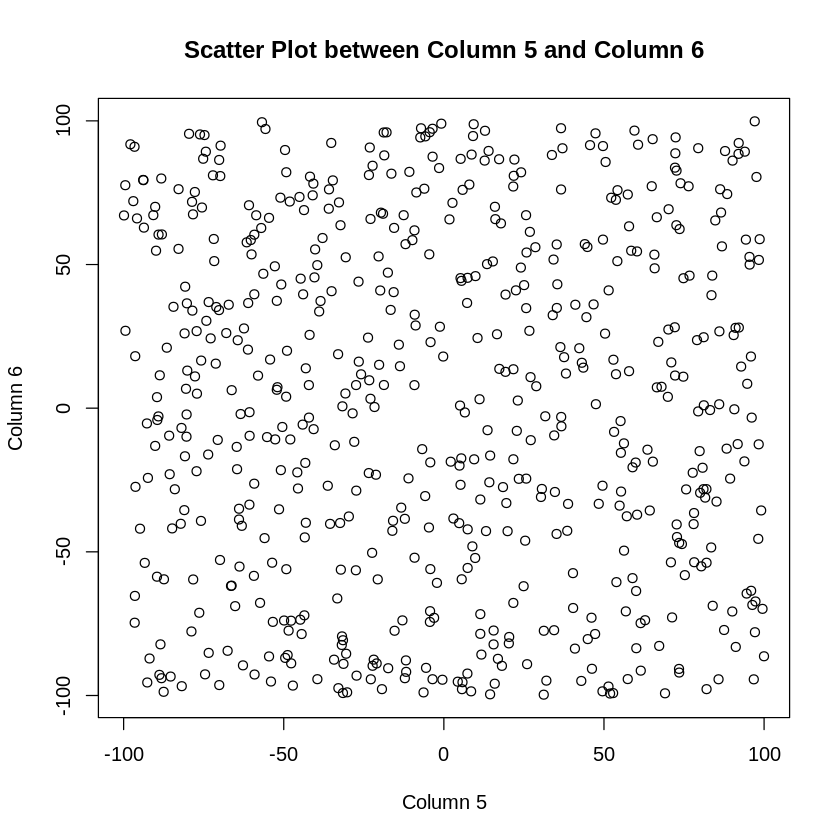

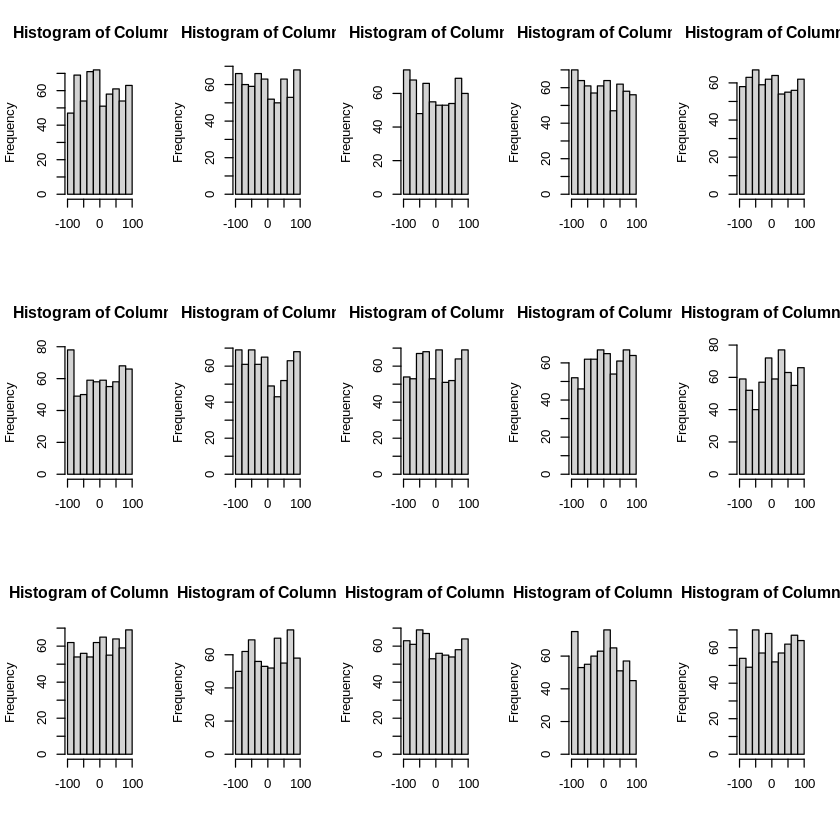

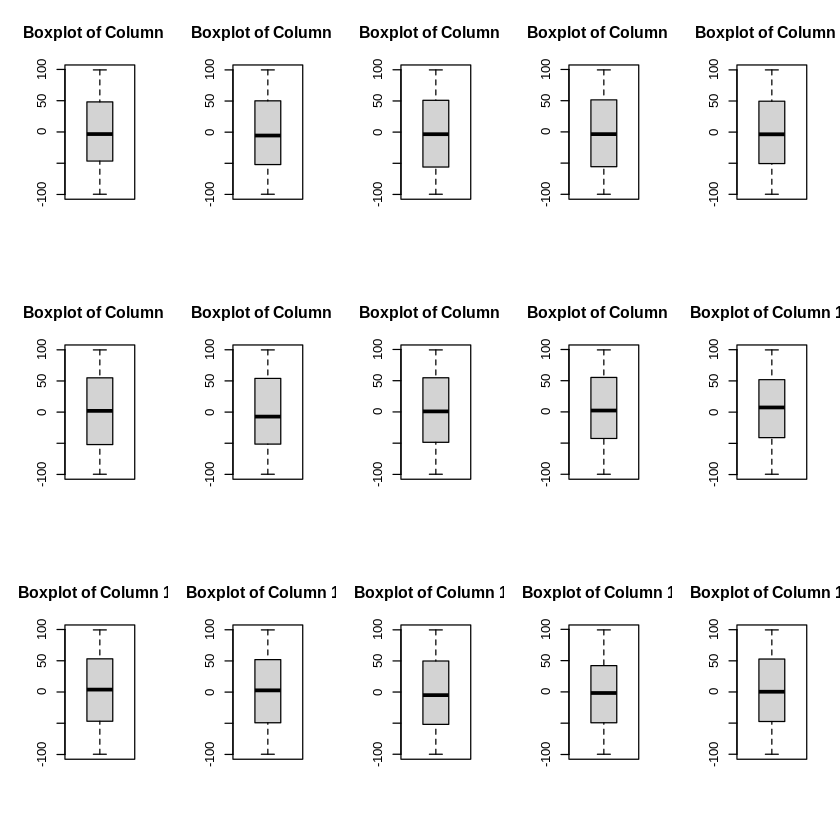

In [ ]:
# Step 1: Generate random dataset
set.seed(0)
data <- matrix(runif(600 * 15, min = -100, max = 100), nrow = 600, ncol = 15)
df <- as.data.frame(data)

# Step 2: Plot scatter graph between Column 5 and Column 6
plot(df$V5, df$V6, xlab = "Column 5", ylab = "Column 6",
     main = "Scatter Plot between Column 5 and Column 6")

# Step 3: Plot histogram of each column in a single graph
par(mfrow = c(3, 5))  # Adjust the layout based on the number of columns
for (i in 1:ncol(df)) {
  hist(df[, i], main = paste("Histogram of Column", i), xlab = "")
}

# Step 4: Plot box plot of each column in a single graph
par(mfrow = c(3, 5))  # Adjust the layout based on the number of columns
for (i in 1:ncol(df)) {
  boxplot(df[, i], main = paste("Boxplot of Column", i), ylab = "")
}


### Q5. Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10].
Perform the following operations:

(i) Perform t-Test on each column.

(ii) Perform Wilcoxon Signed Rank Test on each column.

(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [ ]:
# Step 1: Generate random dataset
set.seed(0)
data <- matrix(runif(500 * 5, min = 5, max = 10), nrow = 500, ncol = 5)
df <- as.data.frame(data)

# Step 2: Perform t-Test on each column
t_test_results <- lapply(df, function(col) {
  t.test(col, mu = 0)
})

# Print t-Test results
cat("t-Test Results:\n")
for (i in seq_along(t_test_results)) {
  cat(sprintf("Column %d:\n", i))
  print(t_test_results[[i]])
}

# Step 3: Perform Wilcoxon Signed Rank Test on each column
wilcox_test_results <- lapply(df, function(col) {
  wilcox.test(col, mu = 0)
})

# Print Wilcoxon Signed Rank Test results
cat("\nWilcoxon Signed Rank Test Results:\n")
for (i in seq_along(wilcox_test_results)) {
  cat(sprintf("Column %d:\n", i))
  print(wilcox_test_results[[i]])
}

# Step 4: Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
# Two Sample t-Test
t_test_2samp <- t.test(df[, 3], df[, 4])

# Wilcoxon Rank Sum Test
wilcox_test_2samp <- wilcox.test(df[, 3], df[, 4])

# Print Two Sample t-Test and Wilcoxon Rank Sum Test results
cat("\nTwo Sample t-Test (Column 3 vs Column 4):\n")
print(t_test_2samp)

cat("\nWilcoxon Rank Sum Test (Column 3 vs Column 4):\n")
print(wilcox_test_2samp)


t-Test Results:
Column 1:

	One Sample t-test

data:  col
t = 118.23, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.362465 7.611295
sample estimates:
mean of x 
  7.48688 

Column 2:

	One Sample t-test

data:  col
t = 114.25, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.389909 7.648514
sample estimates:
mean of x 
 7.519212 

Column 3:

	One Sample t-test

data:  col
t = 113.17, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.268415 7.525245
sample estimates:
mean of x 
  7.39683 

Column 4:

	One Sample t-test

data:  col
t = 111.78, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.366886 7.630489
sample estimates:
mean of x 
 7.498687 

Column 5:

	One Sample t-test

data:  col
t = 113.45, df = 499, p-value < 2.2e-1